<a href="https://colab.research.google.com/github/Freya-LR/strategic_network/blob/master/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, FigureCanvasPdf
from matplotlib.figure import Figure
import keras
from keras.models import Model ,Sequential 
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from sklearn.model_selection import train_test_split

import warnings
import matplotlib.cbook
from IPython.display import SVG
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

with pd.ExcelFile('/content/drive/My Drive/output_values/output_n10_3.xlsx') as reader:
    
    closeness_n10_3=pd.read_excel(reader,sheet_name="closeness_centrality")
    betweenness_n10_3=pd.read_excel(reader,sheet_name="betweenness_centrality")
    eigenvector_n10_3=pd.read_excel(reader,sheet_name="eigenvector_centrality")
    page_rank_n10_3=pd.read_excel(reader,sheet_name="page_rank")
    triangles_n10_3=pd.read_excel(reader,sheet_name="triangles")
    clustering_n10_3=pd.read_excel(reader,sheet_name="clustering")
    wiener_index_n10_3=pd.read_excel(reader,sheet_name="wiener_index")
    transitivity_n10_3=pd.read_excel(reader,sheet_name="transitivity")
    diameter_radius_center_periphery_density_n10_3=pd.read_excel(reader,sheet_name="d_r_c_p_d")
    Efficiency_loss_n10_3=pd.read_excel(reader,sheet_name="Efficiency_loss")




In [ ]:

def com_data(n,closeness, betweenness, eigenvector,page_rank,triangles,clustering,wiener_index,transitivity,
             diameter_radius_center_periphery_density,Efficiency_loss):
    la=np.zeros((n,3))
    for i in range(n):
        la[i]=[wiener_index[0][i],transitivity[0][i],diameter_radius_center_periphery_density[4][i]]

    Y = np.array(Efficiency_loss[0])
    l=np.zeros((n,10,6))
    for i in range(n):
        for j in range(10):
            l[i][j]=[closeness[j][i],betweenness[j][i],eigenvector[j][i],page_rank[j][i],triangles[j][i],clustering[j][i]]
    print(l.shape)
    print(Y.shape)
    print(la.shape)
    return l, la, Y






In [ ]:
def DLSN(X,y):    #convolutional
    #create model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=42)
    num_out_layer=int(max(y_train)+1)
    X_train=np.expand_dims(X_train, axis=3)
    X_test=np.expand_dims(X_test, axis=3)
    num_filters = 8
    filter_size = 3
    pool_size = 2

    model = Sequential([
      Conv2D(num_filters, filter_size, input_shape=(10, 6, 1)),
      MaxPooling2D(pool_size=pool_size),
      Flatten(),
      Dense(num_out_layer, activation='relu'),
    ])
    model.compile(optimizer='adam', loss='mean_squared_error',)
    early_stopping_monitor = EarlyStopping(patience=3)
    model.fit(X_train, to_categorical(y_train),
              validation_data=(X_test, to_categorical(y_test,num_classes=num_out_layer)),
              epochs=30, callbacks=[early_stopping_monitor],)
    # Evaluate the model on the test data using `evaluate`
    print("Evaluate on test data")
    results = model.evaluate(X_test, to_categorical(y_test,num_classes=num_out_layer), verbose=0)
    print("test loss:", results)
    # Generate predictions (probabilities -- the output of the last layer)
    # on new data using `predict`

    print("Generate predictions for 3 samples")
    predictions = model.predict(X_test[:3])

    print(predictions)
    
    return model





In [ ]:
X, Xa, y=com_data(1000, closeness_n10_3, betweenness_n10_3, eigenvector_n10_3,page_rank_n10_3,triangles_n10_3,clustering_n10_3,

        wiener_index_n10_3,transitivity_n10_3,diameter_radius_center_periphery_density_n10_3,Efficiency_loss_n10_3)


model=DLSN(X,y)
y_test[:3]

(1000, 10, 6)
(1000,)
(1000, 3)
Train on 900 samples, validate on 100 samples
Epoch 1/30
900/900 [==============================] - 0s 139us/step - loss: 4.2631 - val_loss: 0.7469
Epoch 2/30
900/900 [==============================] - 0s 80us/step - loss: 0.2396 - val_loss: 0.0624
Epoch 3/30
900/900 [==============================] - 0s 117us/step - loss: 0.0605 - val_loss: 0.0588
Epoch 4/30
900/900 [==============================] - 0s 96us/step - loss: 0.0596 - val_loss: 0.0588
Epoch 5/30
900/900 [==============================] - 0s 99us/step - loss: 0.0595 - val_loss: 0.0588
Epoch 6/30
900/900 [==============================] - 0s 87us/step - loss: 0.0594 - val_loss: 0.0588
Evaluate on test data
test loss: 0.05883291646838188
Generate predictions for 3 samples
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.37996644 0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.

array([ 5.6, 11.2, 13. ])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 8, 4, 8)           80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 2, 8)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 17)                1105      
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


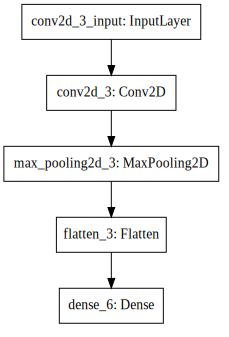

In [ ]:
# Summary of neural network
model.summary()

# Output network visualization
SVG(model_to_dot(model,show_layer_names=True, rankdir='TB',
    expand_nested=False, dpi=70).create(prog='dot', format='svg'))

In [ ]:
def DLSN_s(X,y):   # without convolutional
    #create model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=42)
    num_out_layer=int(max(y_train)+1)
    model = Sequential([
      Dense(10, activation='relu',input_shape=(3, )),
      Dense(10,activation='relu'),
      Dense(num_out_layer),
    ])
    model.compile(optimizer='adam', loss='mean_squared_error',)
    early_stopping_monitor = EarlyStopping(patience=3)
    model.fit(X_train, to_categorical(y_train),
              validation_data=(X_test, to_categorical(y_test,num_classes=num_out_layer)),
              epochs=30, callbacks=[early_stopping_monitor],)
    # Evaluate the model on the test data using `evaluate`
    print("Evaluate on test data")
    results = model.evaluate(X_test, to_categorical(y_test,num_classes=num_out_layer), verbose=0)
    print("test loss:", results)
    # Generate predictions (probabilities -- the output of the last layer)
    # on new data using `predict`

    print("Generate predictions for 3 samples")
    predictions = model.predict(X_test[:3])

    print(predictions)
    
    return model




Train on 900 samples, validate on 100 samples
Epoch 1/30
900/900 [==============================] - 0s 142us/step - loss: 47.5956 - val_loss: 28.2912
Epoch 2/30
900/900 [==============================] - 0s 47us/step - loss: 19.5912 - val_loss: 12.4062
Epoch 3/30
900/900 [==============================] - 0s 52us/step - loss: 8.9497 - val_loss: 5.9556
Epoch 4/30
900/900 [==============================] - 0s 48us/step - loss: 4.3975 - val_loss: 3.0007
Epoch 5/30
900/900 [==============================] - 0s 43us/step - loss: 2.2432 - val_loss: 1.5530
Epoch 6/30
900/900 [==============================] - 0s 51us/step - loss: 1.1753 - val_loss: 0.8278
Epoch 7/30
900/900 [==============================] - 0s 48us/step - loss: 0.6360 - val_loss: 0.4577
Epoch 8/30
900/900 [==============================] - 0s 48us/step - loss: 0.3597 - val_loss: 0.2677
Epoch 9/30
900/900 [==============================] - 0s 52us/step - loss: 0.2175 - val_loss: 0.1696
Epoch 10/30
900/900 [===================

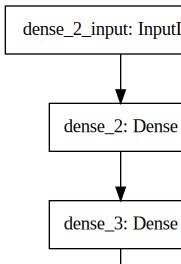

In [ ]:
model_s=DLSN_s(Xa,y)
# Summary of neural network
model_s.summary()

# Output network visualization
SVG(model_to_dot(model_s,show_layer_names=True, rankdir='TB',
    expand_nested=False, dpi=70).create(prog='dot', format='svg'))

In [ ]:
def DLSN_mc(X,y):   # change numbers of filter in convolutional
    #create model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=42)
    num_out_layer=int(max(y_train)+1)
    X_train=np.expand_dims(X_train, axis=3)
    X_test=np.expand_dims(X_test, axis=3)
    num_filters = 32
    filter_size = 4
    pool_size = 2

    model = Sequential([
      Conv2D(num_filters, filter_size, input_shape=(10, 6, 1)),
      MaxPooling2D(pool_size=pool_size),
      Flatten(),
      Dense(num_out_layer, activation='relu'),
    ])
    model.compile(optimizer='adam', loss='mean_squared_error',)
    early_stopping_monitor = EarlyStopping(patience=3)
    model.fit(X_train, to_categorical(y_train), 
              validation_data=(X_test, to_categorical(y_test,num_classes=num_out_layer)),
              epochs=30, callbacks=[early_stopping_monitor],)
    # Evaluate the model on the test data using `evaluate`
    print("Evaluate on test data")
    results = model.evaluate(X_test, to_categorical(y_test,num_classes=num_out_layer), verbose=0)
    print("test loss:", results)
    # Generate predictions (probabilities -- the output of the last layer)
    # on new data using `predict`

    print("Generate predictions for 3 samples")
    predictions = model.predict(X_test[:7])

    print(predictions)
    
    return model




In [ ]:
model_mc=DLSN_mc(X,y)
y_test[:7]


Train on 870 samples, validate on 130 samples
Epoch 1/30
870/870 [==============================] - 0s 199us/step - loss: 0.5420 - val_loss: 0.0589
Epoch 2/30
870/870 [==============================] - 0s 98us/step - loss: 0.0588 - val_loss: 0.0588
Epoch 3/30
870/870 [==============================] - 0s 85us/step - loss: 0.0588 - val_loss: 0.0588
Epoch 4/30
870/870 [==============================] - 0s 75us/step - loss: 0.0588 - val_loss: 0.0588
Epoch 5/30
870/870 [==============================] - 0s 73us/step - loss: 0.0588 - val_loss: 0.0588
Epoch 6/30
870/870 [==============================] - 0s 75us/step - loss: 0.0588 - val_loss: 0.0588
Evaluate on test data
test loss: 0.05883375962193196
Generate predictions for 3 samples
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

array([ 5.6, 11.2, 13. ,  6.9,  8.5, 10.2, 11.3])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 7, 3, 32)          544       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 1, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 96)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 17)                1649      
Total params: 2,193
Trainable params: 2,193
Non-trainable params: 0
_________________________________________________________________


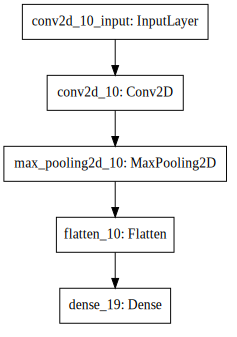

In [ ]:

# Summary of neural network
model_mc.summary()

# Output network visualization
SVG(model_to_dot(model_mc,show_layer_names=True, rankdir='TB',
    expand_nested=False, dpi=70).create(prog='dot', format='svg'))

In [ ]:
with pd.ExcelFile('/content/drive/My Drive/output_values/output_n10_3_combined.xlsx') as reader:
    
    closeness_n10_3_c=pd.read_excel(reader,sheet_name="closeness_centrality")
    betweenness_n10_3_c=pd.read_excel(reader,sheet_name="betweenness_centrality")
    eigenvector_n10_3_c=pd.read_excel(reader,sheet_name="eigenvector_centrality")
    page_rank_n10_3_c=pd.read_excel(reader,sheet_name="page_rank")
    triangles_n10_3_c=pd.read_excel(reader,sheet_name="triangles")
    clustering_n10_3_c=pd.read_excel(reader,sheet_name="clustering")
    wiener_index_n10_3_c=pd.read_excel(reader,sheet_name="wiener_index")
    transitivity_n10_3_c=pd.read_excel(reader,sheet_name="transitivity")
    eccentricity_n10_3_c=pd.read_excel(reader,sheet_name="eccentricity")

    diameter_radius_center_periphery_density_n10_3_c=pd.read_excel(reader,sheet_name="d_r_c_p_d")
    Efficiency_loss_n10_3_c=pd.read_excel(reader,sheet_name="Efficiency_loss")


In [ ]:
X_c, Xa_c, y_c=com_data(10560, closeness_n10_3_c, betweenness_n10_3_c, eigenvector_n10_3_c,
                        page_rank_n10_3_c,triangles_n10_3_c,clustering_n10_3_c,
                        wiener_index_n10_3_c,transitivity_n10_3_c,
                        diameter_radius_center_periphery_density_n10_3_c,
                        Efficiency_loss_n10_3_c)





(10560, 10, 6)
(10560,)
(10560, 3)


In [ ]:
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size=0.23, random_state=42)
model_c=DLSN(X_c,y_c)

Train on 9187 samples, validate on 1373 samples
Epoch 1/30
9187/9187 [==============================] - 1s 72us/step - loss: 0.1028 - val_loss: 0.0070
Epoch 2/30
9187/9187 [==============================] - 1s 68us/step - loss: 0.0069 - val_loss: 0.0069
Epoch 3/30
9187/9187 [==============================] - 1s 65us/step - loss: 0.0069 - val_loss: 0.0069
Epoch 4/30
9187/9187 [==============================] - 1s 64us/step - loss: 0.0069 - val_loss: 0.0069
Epoch 5/30
9187/9187 [==============================] - 1s 69us/step - loss: 0.0069 - val_loss: 0.0069
Epoch 6/30
9187/9187 [==============================] - 1s 68us/step - loss: 0.0069 - val_loss: 0.0069
Epoch 7/30
9187/9187 [==============================] - 1s 80us/step - loss: 0.0069 - val_loss: 0.0069
Epoch 8/30
9187/9187 [==============================] - 1s 78us/step - loss: 0.0069 - val_loss: 0.0069
Epoch 9/30
9187/9187 [==============================] - 1s 81us/step - loss: 0.0068 - val_loss: 0.0069
Epoch 10/30
9187/9187 [==

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 7, 3, 32)          544       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 1, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 96)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 17)                1649      
Total params: 2,193
Trainable params: 2,193
Non-trainable params: 0
_________________________________________________________________


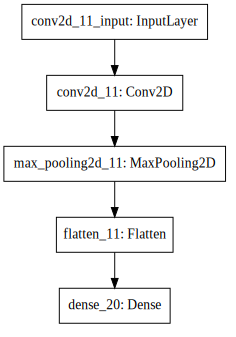

In [ ]:
# Summary of neural network
model_mc.summary()
# Output network visualization
SVG(model_to_dot(model_c,show_layer_names=True, rankdir='TB',
    expand_nested=False, dpi=70).create(prog='dot', format='svg'))

In [ ]:
model_s_c=DLSN_s(Xa_c,y_c)

Train on 9187 samples, validate on 1373 samples
Epoch 1/30
9187/9187 [==============================] - 0s 53us/step - loss: 2.0569 - val_loss: 0.0075
Epoch 2/30
9187/9187 [==============================] - 0s 43us/step - loss: 0.0069 - val_loss: 0.0068
Epoch 3/30
9187/9187 [==============================] - 0s 45us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 4/30
9187/9187 [==============================] - 0s 53us/step - loss: 0.0068 - val_loss: 0.0069
Epoch 5/30
9187/9187 [==============================] - 0s 45us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 6/30
9187/9187 [==============================] - 0s 46us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 7/30
9187/9187 [==============================] - 0s 44us/step - loss: 0.0068 - val_loss: 0.0067
Epoch 8/30
9187/9187 [==============================] - 0s 45us/step - loss: 0.0067 - val_loss: 0.0067
Epoch 9/30
9187/9187 [==============================] - 0s 47us/step - loss: 0.0067 - val_loss: 0.0067
Epoch 10/30
9187/9187 [==

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                40        
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 146)               1606      
Total params: 1,756
Trainable params: 1,756
Non-trainable params: 0
_________________________________________________________________


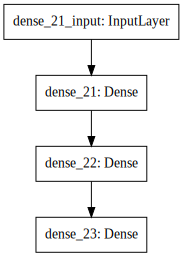

In [ ]:

# Summary of neural network
model_s_c.summary()

# Output network visualization
SVG(model_to_dot(model_s_c,show_layer_names=True, rankdir='TB',
    expand_nested=False, dpi=70).create(prog='dot', format='svg'))

In [ ]:
model_mc_c=DLSN_mc(X_c,y_c)
y_test[:7]

Train on 9187 samples, validate on 1373 samples
Epoch 1/30
9187/9187 [==============================] - 1s 82us/step - loss: 0.0189 - val_loss: 0.0068
Epoch 2/30
9187/9187 [==============================] - 1s 69us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 3/30
9187/9187 [==============================] - 1s 75us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 4/30
9187/9187 [==============================] - 1s 65us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 5/30
9187/9187 [==============================] - 1s 65us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 6/30
9187/9187 [==============================] - 1s 69us/step - loss: 0.0068 - val_loss: 0.0068
Evaluate on test data
test loss: 0.006849710978106348
Generate predictions for 3 samples
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


array([ 5.6, 11.2, 13. ,  6.9,  8.5, 10.2, 11.3])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 7, 3, 32)          544       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 1, 32)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 96)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 146)               14162     
Total params: 14,706
Trainable params: 14,706
Non-trainable params: 0
_________________________________________________________________


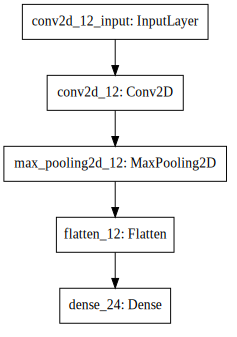

In [ ]:

# Summary of neural network
model_mc_c.summary()

# Output network visualization
SVG(model_to_dot(model_mc_c,show_layer_names=True, rankdir='TB',
    expand_nested=False, dpi=70).create(prog='dot', format='svg'))